## Chapter 1 Introduction

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
# Convective heat transfer: Heat transfer flux solver 
def radiation_heat_flux_black_body(coeff_conv, t_surface, t_fluid):
    '''
    Solve for the convection process heat transfer flux using Newton's law of cooling

    Inputs:
    coeff_conv      convective heat transfer coefficient
    t_surface       temperature of controlled surface
    t_fluid         temperature of bluk fluid flowing around the surface
    '''
    q_flux_conv = coeff_conv * (t_surface-t_fluid)
    return q_flux_conv

# Convective heat transfer: Surface temperature solver
def convection_t_surface(q_flux_conv, coeff_conv, t_fluid):
    '''
    Solve for the convection process surface temperature using Newton's law of cooling

    Inputs:
    q_flux_conv     convective heat transfer flux
    coeff_conv      convective heat transfer coefficient
    t_fluid         temperature of bluk fluid flowing around the surface
    '''
    t_surface = (q_flux_conv / coeff_conv) + t_fluid
    return t_surface

In [171]:
# Radiation heat transfer: Heat transfer flux solver 
def radiation_heat_flux_black_body(emissivity, t_surface, t_surroundings):
    '''
    Solve for the radiation process heat transfer flux using Stefan-Boltzmann equation
    Assuming a black body radiation of a small body inside a large compartment
    
    Inputs:
    emissivity      control surface emissive property, assumed to equate the absobtivity property
    t_surface       temperature of controlled surface
    t_surrpoundings temperature of large surface surrounding the small surface 
    '''
    const_stefan_boltzmann = 5.67*10^-8
    q_flux_rad = const_stefan_boltzmann * emissivity * (t_surface-t_surroundings)
    return q_flux_rad

# Radiation heat transfer: Surface temperature solver
def radiation_t_surface(q_flux_rad, emissivity, t_surface, t_surroundings):
    '''
    Solve for the radiation process surface temperature using Stefan-Boltzmann equation

    Inputs:
    q_flux_rad      radiation heat transfer flux
    emissivity      control surface emissive property, assumed to equate the absobtivity property
    t_surface       temperature of controlled surface
    t_surrpoundings temperature of large surface surrounding the small surface 
    '''
    const_stefan_boltzmann = 5.67*10^-8
    t_surface = ((q_flux_rad / const_stefan_boltzmann / emissivity) + t_surroundings**4)**(1/4)
    return t_surface

In [172]:
'''
Solve a simpler case of Example 4, where there is no heat generation
'''
# Assume there is no heat generation

# Rod dimensions:
rod_diameter    = 0.001     # meters
rod_length      = 0.5       # meters
rod_cross_area  = np.pi*(rod_diameter/2)**2  # cross-sectional area in m^2
rod_volume      = rod_cross_area * rod_length

# Rod material properties:
rod_density         = 7800  # kg/m^3 (steel)
rod_specific_heat   = 500   # J/(kg*K) (steel)
rod_mass            = rod_density * rod_volume  # mass in kg

# Environment convection
t_fluid             = 300       # K (ambient temperature)
contective_coeff    = 600       # W/(m^2*K) (convection heat transfer coefficient)

# Environment radiation
t_large_surface = 300       # K (temperature of the large surface area)
emissivity      = 0.8       # emissivity of the rod surface
sigma           = 5.67e-8   # W/(m^2*K^4) (Stefan-Boltzmann constant)


# Case 1: no heat generation due to electricity
def dT_dt_solver(t_surf, t):
    return (np.pi*rod_diameter*contective_coeff*(t_surf - t_fluid) - np.pi*rod_diameter*emissivity*sigma*(t_surf**4 - t_large_surface**4))/(rod_density*rod_specific_heat*np.pi*rod_diameter**2/4)

# Case 2: heat generation due to electricity
# Energy gen - Electrical power
current             = 6         # I (current through rod)
resistance_per_L    = 0.4       # Ohms (resistance of the rod)
energy_gen          = current**2 * resistance_per_L  * rod_length    # W (power generated by rod)

def dT_dt_gen_solver(t_surf, t):
    return (current**2*resistance_per_L - np.pi*rod_diameter*contective_coeff*(t_surf - t_fluid) - np.pi*rod_diameter*emissivity*sigma*(t_surf**4 - t_large_surface**4))/(rod_density*rod_specific_heat*np.pi*rod_diameter**2/4)


307.5752049054902


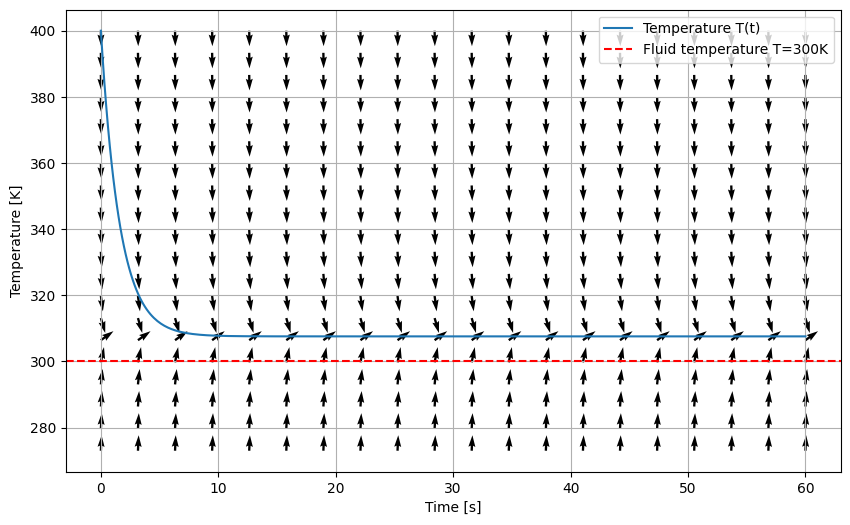

In [173]:

# Compute dT/dt
time_max    = 60
grid_t      = np.linspace(0,time_max,20)
grid_temp   = np.linspace(273,400,20)
t_surf_grid, grid_t = np.meshgrid(grid_temp, grid_t)
dT_dt = dT_dt_gen_solver(t_surf_grid, grid_t)
# Normalize vectors
u = 1
v = dT_dt
magnitude = np.sqrt(u**2 + v**2)
u_norm = u / magnitude  
v_norm = v / magnitude

t_solver    = np.linspace(0, time_max, 400)
t_surf0     = 400                   # Initial condition
t_surf_sol  = odeint(dT_dt_gen_solver, y0=t_surf0, t=t_solver)
t_surf_sol.T[0]
print(max(t_surf_sol[-1]))


# Plot vector field
plt.figure(figsize=(10,6))
plt.plot(t_solver, t_surf_sol,label='Temperature T(t)')
plt.axhline(y=t_fluid, color='red', linestyle='--', label=f'Fluid temperature T={t_fluid}K')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.quiver(grid_t, t_surf_grid, u_norm, v_norm, scale=50)
plt.grid(True)
plt.legend()
plt.show()



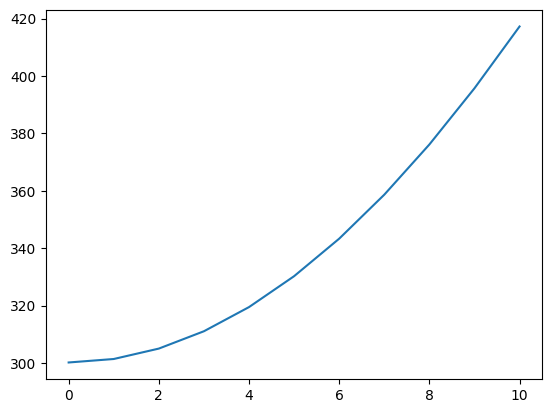

In [174]:
curr_list = [0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10]
t_list = [300.15, 301.36, 304.99, 311.03, 319.45, 330.22, 343.29, 358.62, 376.11, 395.69, 417.23]
plt.plot(curr_list, t_list);

In [198]:
# Modified secant method
def modified_secant(f_x, target_f_x, x_0, f_x_params=None, dx=0.01, error_stop_criterion=1e-10, iter_max=500):
    '''
    Iterate to find the x value that corresponds to when f_x is equal to a target_f_x value
    Assumes there is only one root
    
    Inputs:
    f                   function to find the roots
    x_0                 initial guess
    dx                  perturbation parameter for modified secant method
    error_criterion     iteration error must be below error_criterion to end computation
    iter_max            maximum number of iterations allowed above which computation ends
    '''
    # Initial iteration values
    i = 0               
    x_i             = x_0
    if f_x_params == None:
        f_i = f_x(x_i) - target_f_x
    else:
        f_i = f_x(x_i, f_x_params) - target_f_x

    error_i         = None
    
    # Create dataframe to record iteration values
    dict_iter    = {'Iteration': [i], 'x_i':[x_i], 'f_i':[f_i], 'error_i':[error_i]}
    df_iter      = pd.DataFrame(dict_iter).set_index('Iteration')

    while (error_i == None) or (error_i > error_stop_criterion):        
        # Compute new estimate
        if f_x_params == None:    
            f_dx_i          = f_x(x_i+dx) - target_f_x
        else:
            f_dx_i          = f_x(x_i+dx, f_x_params) - target_f_x

        f_deriv_i       = (f_dx_i - f_i) / dx
        x_i_new         = x_i - f_i/f_deriv_i 
        
        if f_x_params == None:    
            f_i_new         = f_x(x_i_new) - target_f_x
        else:
            f_i_new         = f_x(x_i_new, f_x_params) - target_f_x

        error_i_new     = abs((x_i_new - x_i)/x_i_new)

        # Set and check the next iteration number
        if i == iter_max:   
            print('stopped due to iteration max')
            break
        
        # Set the next iteration x_i and f_i values
        i+=1
        x_i     = x_i_new
        f_i     = f_i_new
        error_i = error_i_new
        df_iter.loc[len(df_iter)] = [x_i, f_i+target_f_x, error_i]

    # Display the dataframe of iteration
    return x_i, f_i+target_f_x, error_i, df_iter

307.32923942512144


C:\Users\luis1\AppData\Local\Temp\ipykernel_6084\3529695417.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_iter.loc[len(df_iter)] = [x_i, f_i+target_f_x, error_i]


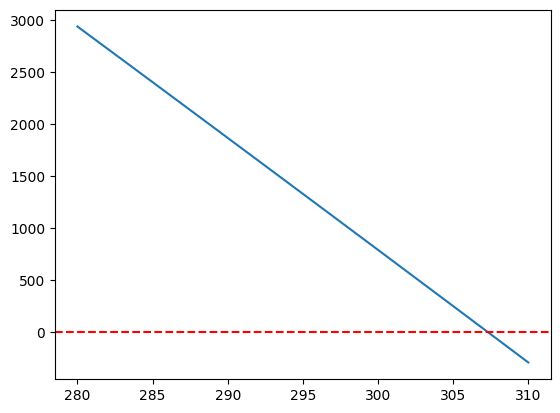

In [ ]:
# Based on Example 1.6
# Human skin surface energy balance

#t_core = 37+273.15          # K (core temperature of human body)
t_skin_inner = 35+273.15    # K (inner skin surface temperature)
l = 0.003                   # m (skin/fat layer)
k = 0.3                     # W/mK (effective thermal conductivity)
surf_area = 1.8             # m**2 (person surface area)
emissivity = 0.95           # (surface emissivity constant)
t_surroundings = 297        # K (temperature of large surface surroundings)

# Case 1: person surrounding by air at t_fluid = 297K and h=2W/n2/K
t_air = 297
h = 2                       # W/m2/K 
# equation solved manually:
# k * (Ti-Ts) / L = h*(Ts-Tinf) + epsilon*sigma*(Ts**4 - Tsurf**4)
# set the left side equal to zero:
# 0 = k * (Ti-Ts) / L - h*(Ts-Tinf) - epsilon*sigma*(Ts**4 - Tsurf**4)

# Can't solve this function explicitly
# Therefore, create a function and find the zeros of this function to obtain implict Ts values
# f(Ts) = 0 = k * (Ti-Ts) / L - h*(Ts-Tinf) - epsilon*sigma*(Ts**4 - Tsurf**4)

def t_skin_surf(t_surf):
 return k * (t_skin_inner-t_surf) / l - h*(t_surf-t_air) - emissivity*sigma*(t_surf**4 - t_surroundings**4)

t_surf_secant, f_zero_secant, error, df =  modified_secant(f_x=t_skin_surf, target_f_x=0, x_0=273)

print(t_surf_secant)

# Idea! Plot the function first :)
t_surf          = np.linspace(280, 310, 100)
f_zero_t_surf   = k*(t_skin_inner-t_surf)/l - h*(t_surf-t_air) - emissivity*sigma*(t_surf**4 - t_surroundings**4)

# value seems to be around 307K = 34C
plt.plot(t_surf, f_zero_t_surf)
plt.axhline(y=0, color='red', linestyle='--', label=f'Modified secant solution when f(t_surf)=0K')
plt.show();
